Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак),
 а за y - значения скорингового балла (то есть, ks - целевая переменная). 
 Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = 10
b1 = (n*np.sum(zp*ks)-np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2)-np.sum(zp)**2)
b1

2.6205388824027653

In [2]:
b0 =np.mean(ks)-b1*np.mean(zp)
b0

444.17735732435955

In [3]:
y_pred = b1 + b1 * zp
y_pred

array([ 94.33939977, 120.54478859, 500.52292654, 526.72831536,
       107.44209418, 186.05826065, 144.12963853, 395.70137124,
       317.08520477, 290.87981595])

Тут я попробовал соместить вторую задачу с первой 
2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [4]:

def mse_(b1, x=zp, y=ks, n=zp.shape[0]):
    return ((b1 * x - y) ** 2).sum() / n

n = 10
alpha = 1e-6
B1 = 0.1
for i in range(3000):
        B1 -= alpha * 2 / n * ((B1 * zp - ks ) * zp).sum()
        if not i % 500:
            print(f'Iteration = {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration = 500, B1 = 5.889815595583751, mse = 56516.858416040064
Iteration = 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943


mse = 56516.85 (B1 = 5.8898)

<function matplotlib.pyplot.show(close=None, block=None)>

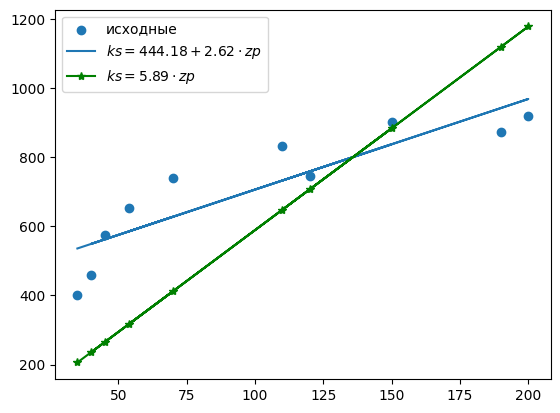

In [5]:
import matplotlib.pyplot as plt
B1 = 5.8898
plt.scatter(zp, ks, label ="исходные")
plt.plot(zp,b0 + b1*zp, label = r'$ks=444.18+2.62\cdot zp$')
plt.plot(zp, B1 *zp, 'g*-', label = r'$ks=5.89\cdot zp$')
plt.legend()
plt.show

In [6]:
import pandas as pd
df = pd.DataFrame({"Реальные":ks," Предсказанные" :y_pred})
df

,Реальные,Предсказанные
0,401,94.339400
1,574,120.544789
2,874,500.522927
3,919,526.728315
4,459,107.442094
5,739,186.058261
6,653,144.129639
7,902,395.701371
8,746,317.085205
9,832,290.879816
